# Linear_reg_KNN

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.api as sm 
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error ,r2_score,explained_variance_score,max_error
from sklearn.model_selection import train_test_split, cross_val_score ,cross_val_predict,GridSearchCV
from statsmodels.tools.eval_measures import mse, rmse
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


In [2]:
df= pd.read_csv('Linear_Regression.csv')
df.drop('Unnamed: 0',axis=1 , inplace=True)
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
X= df.drop('sales',axis=1)
y=df.sales

X_train , X_test , y_train , y_test = train_test_split(X,y, test_size=0.2 , random_state= 40 )

X_train = sm.add_constant(X_train)
result = sm.OLS(y_train, X_train).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     598.6
Date:                Sat, 27 Jun 2020   Prob (F-statistic):           2.48e-85
Time:                        23:51:11   Log-Likelihood:                -288.50
No. Observations:                 160   AIC:                             585.0
Df Residuals:                     156   BIC:                             597.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2572      0.299     10.906      0.000       2.667       3.847
TV             0.0440      0.001     31.330      0.000       0.041       0.047
radio          0.1951      0.008     23.140      0.000       0.178       0.212
newspaper     -0.0035      0.006     -0.590      0.556      -0.015       0.008
==============================================================================
Omnibus:                       14.981   Durbin-Watson:                   1.873
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.537
Skew:                          -0.777   Prob(JB):                     0.000257
Kurtosis:                       3.256   Cond. No.                         436.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

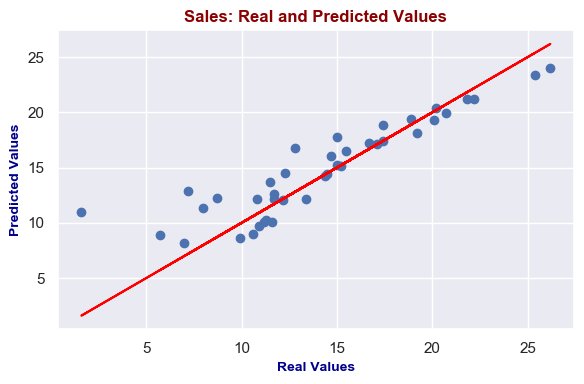

Root Mean Squared Error (RMSE)                : 2.355
Root Mean Squared Error (RMSE) of Train Set   : 1.468


In [4]:
X_test = sm.add_constant(X_test)
y_preds = result.predict(X_test)
X_train= sm.add_constant(X_train)
y_preds_train = result.predict(X_train)

baslik_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 12 }
eksen_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 10 }
plt.figure(dpi = 100)

sns.set(color_codes=True)
plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Real Values", fontdict=eksen_font)
plt.ylabel("Predicted Values", fontdict=eksen_font)
plt.title("Sales: Real and Predicted Values", fontdict=baslik_font)
plt.tight_layout()
plt.show()

print("Root Mean Squared Error (RMSE)                : {:.3f}".format(rmse(y_test, y_preds)))
print("Root Mean Squared Error (RMSE) of Train Set   : {:.3f}".format(rmse(y_train, y_preds_train)))

# Scikit Learn Model

In [5]:
X= df.drop('sales',axis=1)
y=df.sales

X_train , X_test , y_train , y_test = train_test_split(X,y, test_size=0.2 , random_state= 40 )

lm = LinearRegression()
result = lm.fit(X_train, y_train)

In [6]:
cross_val_score(result, X , y , cv= 10, scoring="r2").mean() # Rsquared 

0.8853562237979616

In [7]:
np.sqrt(-cross_val_score(result, X_train , y_train , cv= 10, scoring="neg_mean_squared_error")).mean() # Train Errors -- RMSE VALUES -- 

1.4939738053806084

In [8]:
np.sqrt(-cross_val_score(result, X_test , y_test , cv= 10, scoring="neg_mean_squared_error")).mean() # Test Errors -- RMSE VALUES --  

2.107250748030921

In [9]:
X= df.drop('sales',axis=1)
y=df.sales

scaler=StandardScaler()
X_scl=scaler.fit_transform(X)

X_train , X_test , y_train , y_test = train_test_split(X_scl,y, test_size=0.2 , random_state= 40 )

lm = LinearRegression()
result = lm.fit(X_train, y_train)

In [10]:
test_preds = result.predict(X_test)
train_preds = result.predict(X_train)

In [11]:
def metric(x,y):
    print("mean_squared_error: {}".format(mean_squared_error(x,y)))
    print('r2_score   : {}'.format(r2_score(x,y)))
    print("explained_variance_score : {}".format(explained_variance_score(x,y)))
    print("max_error       : {}".format(max_error(x,y)))
metric(y_test,test_preds) # Test Score

mean_squared_error: 5.544921079243525
r2_score   : 0.7982652261831078
explained_variance_score : 0.8158877941629499
max_error       : 9.384576533196592


In [12]:
metric(y_train,train_preds) #Train Score

mean_squared_error: 2.156275551378613
r2_score   : 0.9200686687210912
explained_variance_score : 0.9200686687210912
max_error       : 4.414310866568133


In [13]:
lm= LinearRegression()

def create_model(X,y,model,tip):
    X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.20, random_state=111)
    lm= LinearRegression()
    model.fit(X_train, y_train)
    
    prediction_train=model.predict(X_train)
    prediction_test=model.predict(X_test)
    
    
    
    d = pd.Series({'mean_squared_error_train':mean_squared_error(y_train,prediction_train),
                   'mean_squared_error_test':mean_squared_error(y_test,prediction_test),
                   'RMSE Train':np.sqrt(mean_squared_error(y_train,prediction_train)),
                   'RMSE Test':np.sqrt(mean_squared_error(y_test,prediction_test)),
                   'r2_score_train':r2_score(y_train,prediction_train),
                   'r2_score_test':r2_score(y_test,prediction_test),
                   'explained_variance_score_train':explained_variance_score(y_train,prediction_train),
                   'explained_variance_score_test':max_error(y_test,prediction_test),
                   'max_error_train':max_error(y_train,prediction_train),
                   'max_error_test':max_error(y_test,prediction_test)},name=tip)
    return d

In [14]:
Best_Model = pd.DataFrame()
Best_Model= Best_Model.append(create_model(X_scl,y,lm,tip='Linear_Model'))
Best_Model

,RMSE Test,RMSE Train,explained_variance_score_test,explained_variance_score_train,max_error_test,max_error_train,mean_squared_error_test,mean_squared_error_train,r2_score_test,r2_score_train
Linear_Model,2.422354,1.435396,9.225817,0.910178,9.225817,5.323189,5.867797,2.060362,0.864951,0.910178


# Alternative Way

In [15]:
# Train error
y_pred = result.predict(X_train)
np.sqrt(mean_squared_error(y_train, y_pred))

1.4684262158442327

In [16]:
# Test Error
y_pred = result.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

2.354765610255833

# KNN Model

In [24]:
X= df.drop('sales',axis=1)
y=df.sales

scaler=StandardScaler()
X_scl=scaler.fit_transform(X)

Knn=KNeighborsRegressor()
Knn.fit(X_train, y_train)

KNeighborsRegressor()

In [25]:
test_preds = Knn.predict(X_test)
train_preds = Knn.predict(X_train)

In [26]:
metric(y_train,train_preds) #Train Score

mean_squared_error: 0.7851800000000002
r2_score   : 0.9708940340888029
explained_variance_score : 0.9710021277699933
max_error       : 3.240000000000001


In [27]:
metric(y_test,test_preds) #Test Score

mean_squared_error: 2.92733
r2_score   : 0.8934981676027806
explained_variance_score : 0.8966535790354748
max_error       : 7.459999999999999


# Model Tuning

In [28]:
Knn=KNeighborsRegressor()
k_range = list(range(1,25))
parameter = dict(n_neighbors=k_range)
grid = GridSearchCV(Knn, parameter, cv=10, scoring='r2')
Grds = grid.fit(X,y)
print('The best parameters:', Grds.best_estimator_)
print('The best score:', Grds.best_score_)

The best parameters: KNeighborsRegressor(n_neighbors=4)
The best score: 0.9241529689086523


In [29]:
Knn = KNeighborsRegressor(n_neighbors=4)
Best_Model=Best_Model.append(create_model(X_scl,y,Knn,tip='Knn_Model'))

In [30]:
Best_Model

,RMSE Test,RMSE Train,explained_variance_score_test,explained_variance_score_train,max_error_test,max_error_train,mean_squared_error_test,mean_squared_error_train,r2_score_test,r2_score_train
Linear_Model,2.422354,1.435396,9.225817,0.910178,9.225817,5.323189,5.867797,2.060362,0.864951,0.910178
Knn_Model,2.032109,0.865227,8.200000,0.967369,8.200000,3.225000,4.129469,0.748617,0.904959,0.967364


# CART MODEL

In [31]:
cart_model = DecisionTreeRegressor()

X= df.drop('sales',axis=1)
y=df.sales

scaler= StandardScaler()
X_scl= scaler.fit_transform(X)

X_train, X_test , y_train , y_test = train_test_split(X_scl ,y, test_size = 0.2 , random_state = 50)

cart_model.fit(X_train,y_train)

DecisionTreeRegressor()

In [32]:
test_preds = cart_model.predict(X_test)
train_preds = cart_model.predict(X_train)

In [34]:
metric(y_test,test_preds) # Test Score

mean_squared_error: 0.6665000000000001
r2_score   : 0.9531882391157388
explained_variance_score : 0.9532514507958526
max_error       : 2.400000000000002


In [35]:
metric(y_train,train_preds) # Train Score

mean_squared_error: 0.0
r2_score   : 1.0
explained_variance_score : 1.0
max_error       : 0.0


# Model Tuning

In [39]:
cart_params= {'min_samples_split':range(2,20), 
             "max_leaf_nodes":range(2,10),
             "max_features":range(0,5)}

cart_cv_model = GridSearchCV(cart_model, cart_params, cv=10)

cart_cv_model.fit(X_train,y_train)
cart_cv_model.best_params_

{'max_features': 3, 'max_leaf_nodes': 9, 'min_samples_split': 3}

In [36]:
cart_model = DecisionTreeRegressor(max_features=3 , max_leaf_nodes=9 , min_samples_split=14 )

Best_Model=Best_Model.append(create_model(X_scl,y,cart_model,tip='cart_model'))
Best_Model

,RMSE Test,RMSE Train,explained_variance_score_test,explained_variance_score_train,max_error_test,max_error_train,mean_squared_error_test,mean_squared_error_train,r2_score_test,r2_score_train
Linear_Model,2.422354,1.435396,9.225817,0.910178,9.225817,5.323189,5.867797,2.060362,0.864951,0.910178
Knn_Model,2.032109,0.865227,8.200000,0.967369,8.200000,3.225000,4.129469,0.748617,0.904959,0.967364
cart_model,1.654691,1.248771,5.352632,0.932017,5.352632,3.752632,2.738001,1.559429,0.936984,0.932017


In [37]:
cart_model = DecisionTreeRegressor()
Best_Model=Best_Model.append(create_model(X_scl,y,cart_model,tip='cart_model_not_tuning'))
Best_Model

,RMSE Test,RMSE Train,explained_variance_score_test,explained_variance_score_train,max_error_test,max_error_train,mean_squared_error_test,mean_squared_error_train,r2_score_test,r2_score_train
Linear_Model,2.422354,1.435396,9.225817,0.910178,9.225817,5.323189,5.867797,2.060362,0.864951,0.910178
Knn_Model,2.032109,0.865227,8.200000,0.967369,8.200000,3.225000,4.129469,0.748617,0.904959,0.967364
cart_model,1.654691,1.248771,5.352632,0.932017,5.352632,3.752632,2.738001,1.559429,0.936984,0.932017
cart_model_not_tuning,1.489127,0.000000,5.700000,1.000000,5.700000,0.000000,2.217500,0.000000,0.948964,1.000000


# Random Forest

In [49]:
random_model = RandomForestRegressor(n_estimators=25, random_state=2)

X= df.drop('sales',axis=1)
y=df.sales

scaler= StandardScaler()
X_scl= scaler.fit_transform(X)

X_train, X_test , y_train , y_test = train_test_split(X_scl ,y, test_size = 0.2 , random_state = 50)

random_model.fit(X_train,y_train)

RandomForestRegressor(n_estimators=25, random_state=2)

In [39]:
test_preds = random_model.predict(X_test)
train_preds = random_model.predict(X_train)

In [40]:
metric(y_test,test_preds) # Test Score 

mean_squared_error: 0.3485779999999997
r2_score   : 0.9755175544103316
explained_variance_score : 0.97552109496677
max_error       : 2.0079999999999973


In [41]:
metric(y_train,train_preds) # Train Score 

mean_squared_error: 0.11314870000000013
r2_score   : 0.996234149744529
explained_variance_score : 0.9962995396887336
max_error       : 1.4400000000000004


# Model Tuning

In [51]:
rf_params = {'max_depth': [2,3,5,8,10],
            "max_features":[1,2,3,4],
            "min_samples_split":[2,5,10]}

rf_cv_model= GridSearchCV(random_model, rf_params , cv=10)

rf_cv_model.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=RandomForestRegressor(n_estimators=25, random_state=2),
             param_grid={'max_depth': [2, 3, 5, 8, 10],
                         'max_features': [1, 2, 3, 4],
                         'min_samples_split': [2, 5, 10]})

In [52]:
print("The best paramters :"+str(rf_cv_model.best_params_))

The best paramters :{'max_depth': 10, 'max_features': 3, 'min_samples_split': 2}


In [42]:
random_model = RandomForestRegressor(n_estimators=25, random_state=2,max_depth=10, max_features=3,min_samples_split=2)

Best_Model=Best_Model.append(create_model(X_scl,y,random_model,tip='random_model'))
Best_Model

,RMSE Test,RMSE Train,explained_variance_score_test,explained_variance_score_train,max_error_test,max_error_train,mean_squared_error_test,mean_squared_error_train,r2_score_test,r2_score_train
Linear_Model,2.422354,1.435396,9.225817,0.910178,9.225817,5.323189,5.867797,2.060362,0.864951,0.910178
Knn_Model,2.032109,0.865227,8.200000,0.967369,8.200000,3.225000,4.129469,0.748617,0.904959,0.967364
cart_model,1.654691,1.248771,5.352632,0.932017,5.352632,3.752632,2.738001,1.559429,0.936984,0.932017
cart_model_not_tuning,1.489127,0.000000,5.700000,1.000000,5.700000,0.000000,2.217500,0.000000,0.948964,1.000000
random_model,1.069866,0.337292,3.664000,0.995113,3.664000,1.016000,1.144613,0.113766,0.973656,0.995040


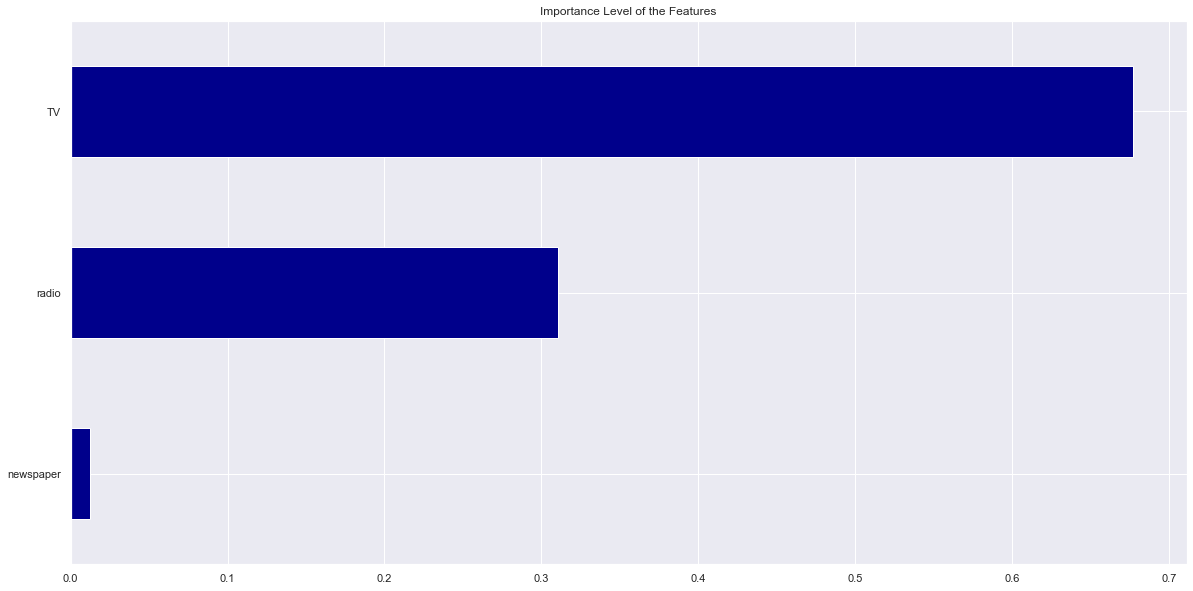

In [48]:
plt.figure(figsize=(20,10))
importance_level = pd.Series(data=random_model.feature_importances_,
                        index= X.columns)

importance_level_sorted = importance_level.sort_values()

importance_level_sorted.plot(kind='barh', color='darkblue')
plt.title('Importance Level of the Features')
plt.show()

# SVM Model

In [50]:
from sklearn.svm import SVR

svm_model = SVR()

X= df.drop('sales',axis=1)
y=df.sales

scaler= StandardScaler()
X_scl= scaler.fit_transform(X)

X_train, X_test , y_train , y_test = train_test_split(X_scl ,y, test_size = 0.2 , random_state = 50)

svm_model.fit(X_train,y_train)

SVR()

In [51]:
test_preds=svm_model.predict(X_test)
train_preds=svm_model.predict(X_train)

In [53]:
metric(y_test,test_preds) # Test Score 

mean_squared_error: 0.9785257547213242
r2_score   : 0.9312730477882883
explained_variance_score : 0.9322735785221317
max_error       : 3.873249755430547


In [55]:
metric(y_train,train_preds) # Train Score

mean_squared_error: 2.051819789426807
r2_score   : 0.9317106950570941
explained_variance_score : 0.9317148295127164
max_error       : 7.616690820793009


# Model Tuning

In [56]:
svr_params = {"C": np.arange(0.1, 2, 0.1)}

svr_cv_model = GridSearchCV(svm_model,svr_params, cv=10 ).fit(X_train,y_train)

svr_cv_model.best_params_

In [58]:
svm_model = SVR(C=1.9000000000000001)

Best_Model=Best_Model.append(create_model(X_scl,y,svm_model,tip='svm_model'))
Best_Model

,RMSE Test,RMSE Train,explained_variance_score_test,explained_variance_score_train,max_error_test,max_error_train,mean_squared_error_test,mean_squared_error_train,r2_score_test,r2_score_train
Linear_Model,2.422354,1.435396,9.225817,0.910178,9.225817,5.323189,5.867797,2.060362,0.864951,0.910178
Knn_Model,2.032109,0.865227,8.200000,0.967369,8.200000,3.225000,4.129469,0.748617,0.904959,0.967364
cart_model,1.654691,1.248771,5.352632,0.932017,5.352632,3.752632,2.738001,1.559429,0.936984,0.932017
cart_model_not_tuning,1.489127,0.000000,5.700000,1.000000,5.700000,0.000000,2.217500,0.000000,0.948964,1.000000
random_model,1.069866,0.337292,3.664000,0.995113,3.664000,1.016000,1.144613,0.113766,0.973656,0.995040
svm_model,2.034898,0.987226,7.537769,0.957521,7.537769,6.293580,4.140811,0.974615,0.904698,0.957512


# Bagging Trees

In [59]:
from sklearn.ensemble import BaggingRegressor

bag_model = BaggingRegressor(bootstrap_features=True)


X= df.drop('sales',axis=1)
y=df.sales

scaler= StandardScaler()
X_scl= scaler.fit_transform(X)

X_train, X_test , y_train , y_test = train_test_split(X_scl ,y, test_size = 0.2 , random_state = 50)

bag_model.fit(X_train,y_train)

BaggingRegressor(bootstrap_features=True)

In [61]:
test_preds=bag_model.predict(X_test)
train_preds=bag_model.predict(X_train)

In [62]:
metric(y_test,test_preds) # Test Score 

mean_squared_error: 6.531702699999999
r2_score   : 0.5412445536992003
explained_variance_score : 0.5414878008480901
max_error       : 7.48


In [63]:
metric(y_train,train_preds) # Train Score

mean_squared_error: 2.966389722222222
r2_score   : 0.9012716938572244
explained_variance_score : 0.9033700445715008
max_error       : 7.48


# Model Tuning

In [64]:
bag_params = {"n_estimators": range(2,20)}

bag_cv_model = GridSearchCV(bag_model,bag_params, cv=10 ).fit(X_train,y_train)

bag_cv_model.best_params_

{'n_estimators': 18}

In [65]:
bag_model = BaggingRegressor(n_estimators=18, random_state=45)


Best_Model=Best_Model.append(create_model(X_scl,y,bag_model,tip='bag_model'))
Best_Model

,RMSE Test,RMSE Train,explained_variance_score_test,explained_variance_score_train,max_error_test,max_error_train,mean_squared_error_test,mean_squared_error_train,r2_score_test,r2_score_train
Linear_Model,2.422354,1.435396,9.225817,0.910178,9.225817,5.323189,5.867797,2.060362,0.864951,0.910178
Knn_Model,2.032109,0.865227,8.200000,0.967369,8.200000,3.225000,4.129469,0.748617,0.904959,0.967364
cart_model,1.654691,1.248771,5.352632,0.932017,5.352632,3.752632,2.738001,1.559429,0.936984,0.932017
cart_model_not_tuning,1.489127,0.000000,5.700000,1.000000,5.700000,0.000000,2.217500,0.000000,0.948964,1.000000
random_model,1.069866,0.337292,3.664000,0.995113,3.664000,1.016000,1.144613,0.113766,0.973656,0.995040
svm_model,2.034898,0.987226,7.537769,0.957521,7.537769,6.293580,4.140811,0.974615,0.904698,0.957512
bag_model,1.197850,0.340766,4.083333,0.994998,4.083333,1.016667,1.434844,0.116121,0.966977,0.994938


# XGBoost

In [66]:
import xgboost as xgb

In [67]:
DM_train = xgb.DMatrix(data=X_train, label=y_train)
DM_test = xgb.DMatrix(data=X_test, label=y_test)

In [80]:
from xgboost import XGBRegressor

In [81]:
xgb = XGBRegressor(base_score=0.5)

X= df.drop('sales',axis=1)
y=df.sales

scaler= StandardScaler()
X_scl= scaler.fit_transform(X)

X_train, X_test , y_train , y_test = train_test_split(X ,y, test_size = 0.2 , random_state = 50)

xgb.fit(X_train,y_train)

[00:43:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [82]:
test_preds=xgb.predict(X_test)
train_preds=xgb.predict(X_train)

In [83]:
metric(y_test,test_preds) # Test Score 

mean_squared_error: 0.23434181481775881
r2_score   : 0.9835409557382855
explained_variance_score : 0.9835533426806833
max_error       : 1.5102815628051758


In [84]:
metric(y_train,train_preds) # Train Score

mean_squared_error: 0.05866721551648748
r2_score   : 0.9980474194706564
explained_variance_score : 0.9980474224428372
max_error       : 0.7819366455078125


# Model Tuning

In [86]:
xgb_params = {'colsample_bytree':[0.4,0.5,0.6, 0.9, 1],
             "n_estimators":[100,200,500,1000],
             "max_depth":[2,3,4,5,6],
             "learning_rate":[0.1,0.01,0.5]}

xgb_cv_model = GridSearchCV(xgb,xgb_params, cv=10, n_jobs= -1 , verbose=2 )

xgb_cv_model.fit(X_train,y_train)

[00:44:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:44:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:44:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:44:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:44:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:44:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:44:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:44:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:44:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

{'colsample_bytree': 0.9,
 'learning_rate': 0.1,
 'max_depth': 2,
 'n_estimators': 500}

In [87]:
xgb_cv_model.best_params_

{'colsample_bytree': 0.9,
 'learning_rate': 0.1,
 'max_depth': 2,
 'n_estimators': 500}

In [89]:
xgb = XGBRegressor(base_score=0.5,colsample_bytree=0.9,learning_rate=0.1
                   ,max_depth=2,n_estimators=500 )


Best_Model=Best_Model.append(create_model(X_scl,y,xgb,tip='xgb_model'))
Best_Model

[00:50:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,RMSE Test,RMSE Train,explained_variance_score_test,explained_variance_score_train,max_error_test,max_error_train,mean_squared_error_test,mean_squared_error_train,r2_score_test,r2_score_train
Linear_Model,2.422354,1.435396,9.225817,0.910178,9.225817,5.323189,5.867797,2.060362,0.864951,0.910178
Knn_Model,2.032109,0.865227,8.200000,0.967369,8.200000,3.225000,4.129469,0.748617,0.904959,0.967364
cart_model,1.654691,1.248771,5.352632,0.932017,5.352632,3.752632,2.738001,1.559429,0.936984,0.932017
cart_model_not_tuning,1.489127,0.000000,5.700000,1.000000,5.700000,0.000000,2.217500,0.000000,0.948964,1.000000
random_model,1.069866,0.337292,3.664000,0.995113,3.664000,1.016000,1.144613,0.113766,0.973656,0.995040
svm_model,2.034898,0.987226,7.537769,0.957521,7.537769,6.293580,4.140811,0.974615,0.904698,0.957512
bag_model,1.197850,0.340766,4.083333,0.994998,4.083333,1.016667,1.434844,0.116121,0.966977,0.994938
xgb_model,1.190473,0.127866,4.737308,0.999287,4.737308,0.375045,1.417226,0.016350,0.967382,0.999287


# Light GBM 

In [91]:
from lightgbm import LGBMRegressor

In [93]:
lgbm = LGBMRegressor()

X= df.drop('sales',axis=1)
y=df.sales

scaler= StandardScaler()
X_scl= scaler.fit_transform(X)

X_train, X_test , y_train , y_test = train_test_split(X ,y, test_size = 0.2 , random_state = 50)

lgbm.fit(X_train,y_train)

LGBMRegressor()

In [94]:
test_preds=lgbm.predict(X_test)
train_preds=lgbm.predict(X_train)

In [95]:
metric(y_test,test_preds) # Test Score 

mean_squared_error: 0.4399132989390176
r2_score   : 0.969102601410743
explained_variance_score : 0.970109155717915
max_error       : 1.9595794519919352


In [96]:
metric(y_train,train_preds) # Train Score

mean_squared_error: 0.4772129870868972
r2_score   : 0.9841172488120918
explained_variance_score : 0.9841172488120918
max_error       : 4.140412255835525


# Model Tuning

In [97]:
lgbm_params = {'colsample_bytree':[0.4,0.5,0.6, 0.9, 1],
             "n_estimators":[100,200,500,1000],
             "max_depth":[2,3,4,5,6],
             "learning_rate":[0.1,0.01,0.5]}

lgbm_cv_model = GridSearchCV(lgbm,lgbm_params, cv=10, n_jobs= -1 , verbose=2 )

lgbm_cv_model.fit(X_train,y_train)

Fitting 10 folds for each of 300 candidates, totalling 3000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 348 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 1160 tasks      | elapsed:   19.0s
[Parallel(n_jobs=-1)]: Done 2292 tasks      | elapsed:   36.1s
[Parallel(n_jobs=-1)]: Done 3000 out of 3000 | elapsed:   47.2s finished


GridSearchCV(cv=10, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'colsample_bytree': [0.4, 0.5, 0.6, 0.9, 1],
                         'learning_rate': [0.1, 0.01, 0.5],
                         'max_depth': [2, 3, 4, 5, 6],
                         'n_estimators': [100, 200, 500, 1000]},
             verbose=2)

In [98]:
lgbm_cv_model.best_params_

{'colsample_bytree': 0.4,
 'learning_rate': 0.1,
 'max_depth': 3,
 'n_estimators': 500}

In [100]:
lgbm = LGBMRegressor(colsample_bytree=0.9,learning_rate=0.1
                   ,max_depth=2,n_estimators=500 )

Best_Model=Best_Model.append(create_model(X_scl,y,lgbm,tip='lgbm_model'))
Best_Model

,RMSE Test,RMSE Train,explained_variance_score_test,explained_variance_score_train,max_error_test,max_error_train,mean_squared_error_test,mean_squared_error_train,r2_score_test,r2_score_train
Linear_Model,2.422354,1.435396,9.225817,0.910178,9.225817,5.323189,5.867797,2.060362,0.864951,0.910178
Knn_Model,2.032109,0.865227,8.200000,0.967369,8.200000,3.225000,4.129469,0.748617,0.904959,0.967364
cart_model,1.654691,1.248771,5.352632,0.932017,5.352632,3.752632,2.738001,1.559429,0.936984,0.932017
cart_model_not_tuning,1.489127,0.000000,5.700000,1.000000,5.700000,0.000000,2.217500,0.000000,0.948964,1.000000
random_model,1.069866,0.337292,3.664000,0.995113,3.664000,1.016000,1.144613,0.113766,0.973656,0.995040
svm_model,2.034898,0.987226,7.537769,0.957521,7.537769,6.293580,4.140811,0.974615,0.904698,0.957512
bag_model,1.197850,0.340766,4.083333,0.994998,4.083333,1.016667,1.434844,0.116121,0.966977,0.994938
xgb_model,1.190473,0.127866,4.737308,0.999287,4.737308,0.375045,1.417226,0.016350,0.967382,0.999287
xgb_model,1.190473,0.127866,4.737308,0.999287,4.737308,0.375045,1.417226,0.016350,0.967382,0.999287
lgbm_model,1.505303,0.529307,6.886496,0.987786,6.886496,2.312904,2.265937,0.280165,0.947849,0.987786


# CatBoost 

In [101]:
from catboost import CatBoostRegressor

catboost_model = CatBoostRegressor()

X= df.drop('sales',axis=1)
y=df.sales

scaler= StandardScaler()
X_scl= scaler.fit_transform(X)

X_train, X_test , y_train , y_test = train_test_split(X ,y, test_size = 0.2 , random_state = 50)

catboost_model.fit(X_train,y_train)

Learning rate set to 0.028167
0:	learn: 5.3895230	total: 78.7ms	remaining: 1m 18s
1:	learn: 5.2966964	total: 79.7ms	remaining: 39.8s
2:	learn: 5.1879369	total: 80.6ms	remaining: 26.8s
3:	learn: 5.1033331	total: 81.5ms	remaining: 20.3s
4:	learn: 5.0065703	total: 82.4ms	remaining: 16.4s
5:	learn: 4.9060196	total: 83.3ms	remaining: 13.8s
6:	learn: 4.8202667	total: 84.2ms	remaining: 11.9s
7:	learn: 4.7367932	total: 85.1ms	remaining: 10.6s
8:	learn: 4.6622662	total: 86ms	remaining: 9.47s
9:	learn: 4.5820576	total: 86.9ms	remaining: 8.6s
10:	learn: 4.5038329	total: 87.8ms	remaining: 7.89s
11:	learn: 4.4185237	total: 88.7ms	remaining: 7.3s
12:	learn: 4.3437758	total: 89.6ms	remaining: 6.8s
13:	learn: 4.2789195	total: 90.4ms	remaining: 6.37s
14:	learn: 4.1926649	total: 91.3ms	remaining: 6s
15:	learn: 4.1245083	total: 92.2ms	remaining: 5.67s
16:	learn: 4.0554671	total: 93.1ms	remaining: 5.38s
17:	learn: 3.9884998	total: 93.9ms	remaining: 5.13s
18:	learn: 3.9134398	total: 94.8ms	remaining: 4.89s

In [102]:
test_preds=lgbm.predict(X_test)
train_preds=lgbm.predict(X_train)

In [103]:
metric(y_test,test_preds) # Test Score 

mean_squared_error: 143.5867062674102
r2_score   : -9.08484105018552
explained_variance_score : 0.057310662081153985
max_error       : 19.902597155090568


In [104]:
metric(y_train,train_preds) # Train Score

mean_squared_error: 136.85078408892338
r2_score   : -3.554710396342844
explained_variance_score : 0.027774082493785435
max_error       : 21.50259715509057


# Model Tuning

In [106]:
catb_params = {
    "iterations":[200,500,1000,2000],
    "learning_rate":[0.01,0.03,0.05,0.1],
    "depth":[3,4,5,6,7,8]}

cat_cv_model = GridSearchCV(catboost_model,catb_params, cv=10, n_jobs= -1 , verbose=2 )

cat_cv_model.fit(X_train,y_train)

Fitting 10 folds for each of 96 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   52.1s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed: 11.6min finished


0:	learn: 5.3247229	total: 581us	remaining: 581ms
1:	learn: 5.1489019	total: 1.01ms	remaining: 505ms
2:	learn: 4.9760150	total: 1.45ms	remaining: 483ms
3:	learn: 4.8048400	total: 1.9ms	remaining: 473ms
4:	learn: 4.6392012	total: 2.3ms	remaining: 457ms
5:	learn: 4.4779116	total: 2.7ms	remaining: 448ms
6:	learn: 4.3385403	total: 3.11ms	remaining: 442ms
7:	learn: 4.2123724	total: 3.52ms	remaining: 436ms
8:	learn: 4.0726637	total: 3.93ms	remaining: 432ms
9:	learn: 3.9545016	total: 4.32ms	remaining: 428ms
10:	learn: 3.8264557	total: 4.69ms	remaining: 422ms
11:	learn: 3.7014863	total: 5.08ms	remaining: 418ms
12:	learn: 3.6028462	total: 5.46ms	remaining: 415ms
13:	learn: 3.4927819	total: 5.86ms	remaining: 413ms
14:	learn: 3.3750454	total: 6.26ms	remaining: 411ms
15:	learn: 3.2729502	total: 6.67ms	remaining: 410ms
16:	learn: 3.1952278	total: 7.09ms	remaining: 410ms
17:	learn: 3.0998521	total: 7.45ms	remaining: 407ms
18:	learn: 3.0088787	total: 7.86ms	remaining: 406ms
19:	learn: 2.9225552	total

GridSearchCV(cv=10,
             estimator=<catboost.core.CatBoostRegressor object at 0x00000242BACB5048>,
             n_jobs=-1,
             param_grid={'depth': [3, 4, 5, 6, 7, 8],
                         'iterations': [200, 500, 1000, 2000],
                         'learning_rate': [0.01, 0.03, 0.05, 0.1]},
             verbose=2)

In [107]:
cat_cv_model.best_params_

{'depth': 3, 'iterations': 1000, 'learning_rate': 0.05}

In [108]:
catboost_model = CatBoostRegressor(depth=3 , iterations=1000, learning_rate= 0.05)

Best_Model=Best_Model.append(create_model(X_scl,y,catboost_model,tip='catboost_model'))

0:	learn: 4.6507952	total: 1.04ms	remaining: 1.04s
1:	learn: 4.4977160	total: 1.67ms	remaining: 834ms
2:	learn: 4.3437395	total: 2.21ms	remaining: 734ms
3:	learn: 4.1960256	total: 2.76ms	remaining: 687ms
4:	learn: 4.0657947	total: 3.27ms	remaining: 651ms
5:	learn: 3.9369393	total: 3.78ms	remaining: 626ms
6:	learn: 3.8116525	total: 4.24ms	remaining: 602ms
7:	learn: 3.6852452	total: 4.88ms	remaining: 605ms
8:	learn: 3.5759100	total: 5.43ms	remaining: 598ms
9:	learn: 3.4767724	total: 5.94ms	remaining: 588ms
10:	learn: 3.3618171	total: 6.44ms	remaining: 579ms
11:	learn: 3.2653807	total: 6.93ms	remaining: 571ms
12:	learn: 3.1843755	total: 7.42ms	remaining: 564ms
13:	learn: 3.0922555	total: 7.91ms	remaining: 557ms
14:	learn: 3.0124221	total: 8.39ms	remaining: 551ms
15:	learn: 2.9269970	total: 8.88ms	remaining: 546ms
16:	learn: 2.8523695	total: 9.35ms	remaining: 541ms
17:	learn: 2.7672636	total: 9.86ms	remaining: 538ms
18:	learn: 2.6848881	total: 10.3ms	remaining: 534ms
19:	learn: 2.6060809	t

# Results

In [109]:
Best_Model

,RMSE Test,RMSE Train,explained_variance_score_test,explained_variance_score_train,max_error_test,max_error_train,mean_squared_error_test,mean_squared_error_train,r2_score_test,r2_score_train
Linear_Model,2.422354,1.435396,9.225817,0.910178,9.225817,5.323189,5.867797,2.060362,0.864951,0.910178
Knn_Model,2.032109,0.865227,8.200000,0.967369,8.200000,3.225000,4.129469,0.748617,0.904959,0.967364
cart_model,1.654691,1.248771,5.352632,0.932017,5.352632,3.752632,2.738001,1.559429,0.936984,0.932017
cart_model_not_tuning,1.489127,0.000000,5.700000,1.000000,5.700000,0.000000,2.217500,0.000000,0.948964,1.000000
random_model,1.069866,0.337292,3.664000,0.995113,3.664000,1.016000,1.144613,0.113766,0.973656,0.995040
svm_model,2.034898,0.987226,7.537769,0.957521,7.537769,6.293580,4.140811,0.974615,0.904698,0.957512
bag_model,1.197850,0.340766,4.083333,0.994998,4.083333,1.016667,1.434844,0.116121,0.966977,0.994938
xgb_model,1.190473,0.127866,4.737308,0.999287,4.737308,0.375045,1.417226,0.016350,0.967382,0.999287
xgb_model,1.190473,0.127866,4.737308,0.999287,4.737308,0.375045,1.417226,0.016350,0.967382,0.999287
lgbm_model,1.505303,0.529307,6.886496,0.987786,6.886496,2.312904,2.265937,0.280165,0.947849,0.987786
